# mf4 demo

Jupyter Notebook version of [asammdf/examples/mdf4_demo.py](https://github.com/danielhrisca/asammdf/blob/master/examples/mf4_demo.py)

In [2]:
from asammdf import MDF, Signal
import numpy as np
from IPython.display import display, display_png
from PIL import Image

Set end time and sampling rate for time signal.

In [3]:
time_final = 100 # [s]
sampling_rate = 100 # [Hz]

In [4]:
dT = 1/sampling_rate # [s]
# MATLAB® function: t=[0:1/sampling_rate:time_final]
t = np.arange(0, time_final, 1/sampling_rate, dtype=np.float64)
cycles = len(t)

**Technical Note**: ```np.arange``` does not work exactly like MATLAB®'s [colon notation (```x:y:z```)[https://www.mathworks.com/help/matlab/ref/colon.html]. It does not include the end point:

In [5]:
t[-1]

99.99000000000001

```matlab
>> t = 0:dT:time_final;
>> t(end)

ans =

   100
```

In [6]:
# Show MDF Documentation
MDF?

Create ```MDF``` instance called ```mdf```.

In [7]:
mdf = MDF()

# Single dimensional channels

In [8]:
sigs = []

## No conversion

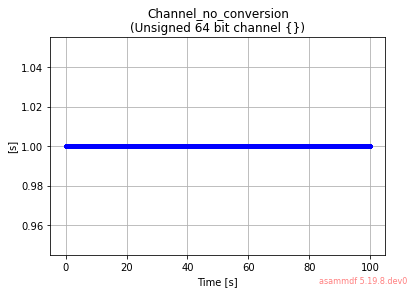

In [9]:
sig = Signal(
    np.ones(len(t), dtype=np.uint64),
    t,
    name="Channel_no_conversion",
    unit="s",
    conversion=None,
    comment="Unsigned 64 bit channel {}",
)
sig.plot()
sigs.append(sig)

## Linear

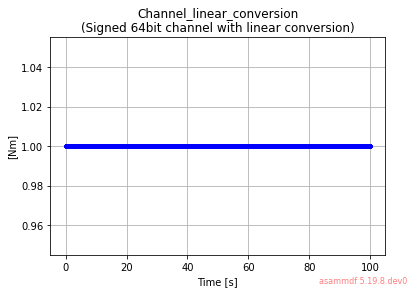

In [10]:
conversion = {
    "a": 2,
    "b": -0.5,
}
sig = Signal(
    np.ones(cycles, dtype=np.int64),
    t,
    name="Channel_linear_conversion",
    unit="Nm",
    conversion=conversion,
    comment="Signed 64bit channel with linear conversion",
)
sig.plot()
sigs.append(sig)

## Algebraic

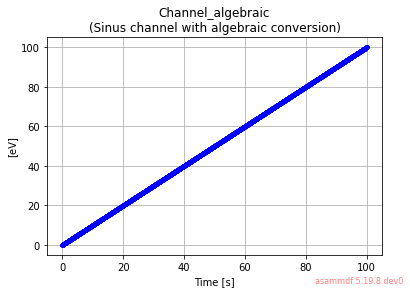

In [11]:
conversion = {
    "formula": "2 * sin(X)",
}
sig = Signal(
    np.arange(cycles, dtype=np.int32) / 100.0,
    t,
    name="Channel_algebraic",
    unit="eV",
    conversion=conversion,
    comment="Sinus channel with algebraic conversion",
)
sig.plot()
sigs.append(sig)

## Rational

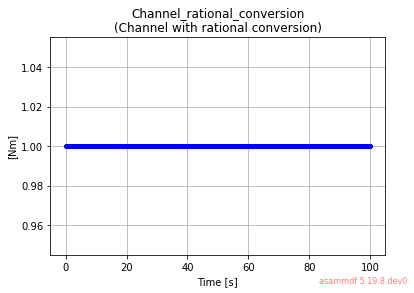

In [12]:
conversion = {
    "P1": 0,
    "P2": 4,
    "P3": -0.5,
    "P4": 0,
    "P5": 0,
    "P6": 1,
}
sig = Signal(
    np.ones(cycles, dtype=np.int64),
    t,
    name="Channel_rational_conversion",
    unit="Nm",
    conversion=conversion,
    comment="Channel with rational conversion",
)
sig.plot()
sigs.append(sig)


## String channel

In [13]:
sig = ["String channel sample {}".format(j).encode("ascii") for j in range(cycles)]
sig = Signal(
    np.array(sig),
    t,
    name="Channel_string",
    comment="String channel",
    encoding="latin-1",
)
sigs.append(sig)

## byte array

In [14]:
ones = np.ones(cycles, dtype=np.dtype("(8,)u1"))
sig = Signal(ones * 111, t, name="Channel_bytearay", comment="Byte array channel",)
sigs.append(sig)

## Tabular

In [15]:
vals = 20
conversion = {"raw_{}".format(i): i for i in range(vals)}
conversion.update({"phys_{}".format(i): -i for i in range(vals)})
sig = Signal(
    np.arange(cycles, dtype=np.uint32) % 20,
    t,
    name="Channel_tabular",
    unit="-",
    conversion=conversion,
    comment="Tabular channel",
)
sigs.append(sig)

## Value to text

In [16]:
vals = 20
conversion = {"val_{}".format(i): i for i in range(vals)}
conversion.update(
    {"text_{}".format(i): "key_{}".format(i).encode("ascii") for i in range(vals)}
)
conversion["default"] = b"default key"
sig = Signal(
    np.arange(cycles, dtype=np.uint32) % 30,
    t,
    name="Channel_value_to_text",
    conversion=conversion,
    comment="Value to text channel",
)
sigs.append(sig)

## Tabular with range

In [17]:
vals = 20
conversion = {"lower_{}".format(i): i * 10 for i in range(vals)}
conversion.update({"upper_{}".format(i): (i + 1) * 10 for i in range(vals)})
conversion.update({"phys_{}".format(i): i for i in range(vals)})
conversion["default"] = -1
sig = Signal(
    2 * np.arange(cycles, dtype=np.float64),
    t,
    name="Channel_value_range_to_value",
    unit="order",
    conversion=conversion,
    comment="Value range to value channel",
)
sigs.append(sig)

## Value range to text

In [18]:
vals = 20
conversion = {"lower_{}".format(i): i * 10 for i in range(vals)}
conversion.update({"upper_{}".format(i): (i + 1) * 10 - 5 for i in range(vals)})
conversion.update({"text_{}".format(i): "Level {}".format(i) for i in range(vals)})
conversion["default"] = b"Unknown level"
sig = Signal(
    6 * np.arange(cycles, dtype=np.uint64) % 240,
    t,
    name="Channel_value_range_to_text",
    conversion=conversion,
    comment="Value range to text channel",
)
sigs.append(sig)


mdf.append(sigs, "single dimensional channels", common_timebase=True);

# Channel structure composition

In [19]:
sigs = []

## Lookup table with axis

In [20]:
samples = [
    np.ones((cycles, 2, 3), dtype=np.uint64) * 1,
    np.ones((cycles, 2), dtype=np.uint64) * 2,
    np.ones((cycles, 3), dtype=np.uint64) * 3,
]

types = [
    ("Channel_lookup_with_axis", "(2, 3)<u8"),
    ("channel_axis_1", "(2, )<u8"),
    ("channel_axis_2", "(3, )<u8"),
]

sig = Signal(
    np.core.records.fromarrays(samples, dtype=np.dtype(types)),
    t,
    name="Channel_lookup_with_axis",
    unit="A",
    comment="Array channel with axis",
)
sigs.append(sig)

## Lookup table with default axis

In [21]:
samples = [
    np.ones((cycles, 2, 3), dtype=np.uint64) * 4,
]

types = [
    ("Channel_lookup_with_default_axis", "(2, 3)<u8"),
]

sig = Signal(
    np.core.records.fromarrays(samples, dtype=np.dtype(types)),
    t,
    name="Channel_lookup_with_default_axis",
    unit="mA",
    comment="Array channel with default axis",
)
sigs.append(sig)

## Structure channel composition

In [22]:
samples = [
    np.ones(cycles, dtype=np.uint8) * 10,
    np.ones(cycles, dtype=np.uint16) * 20,
    np.ones(cycles, dtype=np.uint32) * 30,
    np.ones(cycles, dtype=np.uint64) * 40,
    np.ones(cycles, dtype=np.int8) * -10,
    np.ones(cycles, dtype=np.int16) * -20,
    np.ones(cycles, dtype=np.int32) * -30,
    np.ones(cycles, dtype=np.int64) * -40,
]

types = [
    ("struct_channel_0", np.uint8),
    ("struct_channel_1", np.uint16),
    ("struct_channel_2", np.uint32),
    ("struct_channel_3", np.uint64),
    ("struct_channel_4", np.int8),
    ("struct_channel_5", np.int16),
    ("struct_channel_6", np.int32),
    ("struct_channel_7", np.int64),
]

sig = Signal(
    np.core.records.fromarrays(samples, dtype=np.dtype(types)),
    t,
    name="Channel_structure_composition",
    comment="Structure channel composition",
)
sigs.append(sig)

# Nested structures

In [23]:
l4_arr = [
    np.ones(cycles, dtype=np.float64) * 41,
    np.ones(cycles, dtype=np.float64) * 42,
    np.ones(cycles, dtype=np.float64) * 43,
    np.ones(cycles, dtype=np.float64) * 44,
]

types = [
    ("level41", np.float64),
    ("level42", np.float64),
    ("level43", np.float64),
    ("level44", np.float64),
]

l4_arr = np.core.records.fromarrays(l4_arr, dtype=types)

l3_arr = [
    l4_arr,
    l4_arr,
    l4_arr,
]

types = [
    ("level31", l4_arr.dtype),
    ("level32", l4_arr.dtype),
    ("level33", l4_arr.dtype),
]

l3_arr = np.core.records.fromarrays(l3_arr, dtype=types)


l2_arr = [
    l3_arr,
    l3_arr,
]

types = [
    ("level21", l3_arr.dtype),
    ("level22", l3_arr.dtype),
]

l2_arr = np.core.records.fromarrays(l2_arr, dtype=types)


l1_arr = [
    l2_arr,
]

types = [
    ("level11", l2_arr.dtype),
]

l1_arr = np.core.records.fromarrays(l1_arr, dtype=types)

sig = Signal(l1_arr, t, name="Nested_structures",)

sigs.append(sig)

# Append Signals to MDF

In [24]:
mdf.append(sigs, "arrays", common_timebase=True)

1

# Save MDF

In [25]:
mdf.save("demo.mf4", overwrite=True)

PosixPath('demo.mf4')

# Analyze MDF

/projects/Jupyter_MDF_Analysis/asammdf/asammdf/signal.py:319: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection="3d")


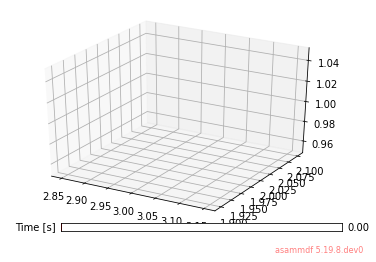

/projects/Jupyter_MDF_Analysis/asammdf/asammdf/signal.py:262: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection="3d")


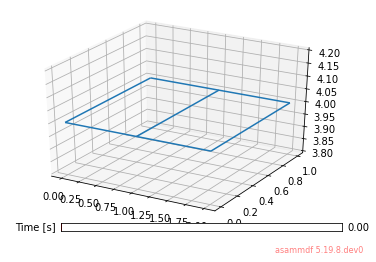

Argument Z must be 2-dimensional.
tuple index out of range


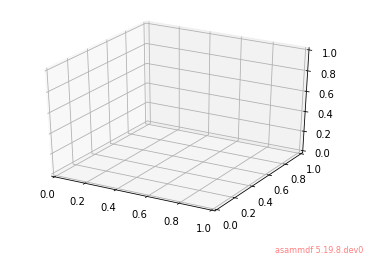

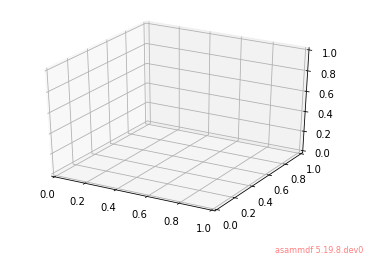

In [33]:
for sig in sigs:
    sig.plot()